https://www.dlology.com/blog/how-to-do-hyperparameter-search-with-baysian-optimization-for-keras-model/

http://research.sualab.com/introduction/practice/2019/04/01/bayesian-optimization-overview-2.html

https://github.com/fmfn/BayesianOptimization

In [5]:
from bayes_opt import BayesianOptimization
import numpy as np
import matplotlib.pyplot as plt

# 1. 입력값 및 목적 함수 정의

In [2]:
def target(x):
    return np.exp(-(x-3)**2) + np.exp(-(3*x-2)**2) + 1/(x**2+1)

In [4]:
x_grid = np.arange(-2,6,0.01)
y_grid = target(np.arange(-2,6,0.01))

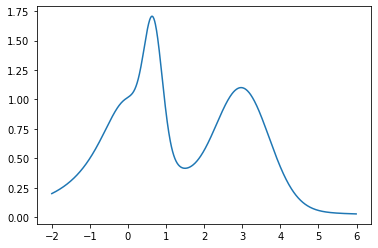

In [6]:
plt.plot(x_grid, y_grid)

# 2. BayesianOptimization 객체 생성

In [11]:
bayes_optimizer = BayesianOptimization(target, {'x': (-2, 6)}, random_state=0)

# 3. Bayesian Optimization 실행

In [8]:
bayes_optimizer.maximize(init_points=2, n_iter=14, acq='ei', xi=0.01)

|   iter    |  target   |     x     |
-------------------------------------
|  1        |  0.8386   |  2.391    |
|  2        |  0.6615   |  3.722    |
|  3        |  0.2      | -2.0      |
|  4        |  0.5116   |  1.215    |
|  5        |  0.02715  |  6.0      |
|  6        |  1.057    |  2.751    |
|  7        |  0.9193   | -0.2969   |
|  8        |  1.1      |  2.996    |
|  9        |  1.132    |  0.2321   |
|  10       |  1.05     |  0.1093   |
|  11       |  1.498    |  0.4547   |
|  12       |  1.707    |  0.6296   |
|  13       |  0.08147  |  4.796    |
|  14       |  0.4498   | -1.106    |
|  15       |  1.662    |  0.7032   |
|  16       |  0.03633  |  5.399    |


`init_points` : 맨 처음에 몇개 뿌리고 selection을 시작할 지에 대한 argument

`n_iter` : 몇 번 update할 지

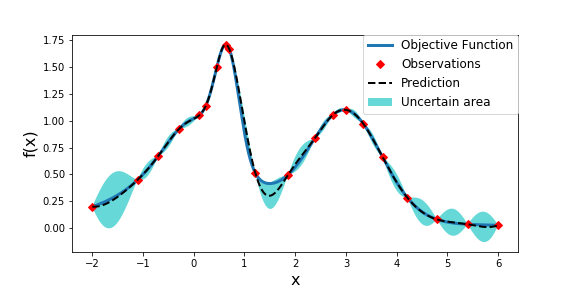

# 4. Application

In [1]:
import os, shutil
import pandas as pd

In [2]:
# original location
data_dir = os.getcwd() + '\\data\\train\\images'
# destination
dest_dir = os.getcwd() + '\\data\\splited'

# split data train/valid/test
train_dir = os.path.join(dest_dir, 'train')
validation_dir = os.path.join(dest_dir, 'valid')
test_dir = os.path.join(dest_dir, 'test')

train_Cargo_dir = os.path.join(train_dir, 'Cargo')
train_Military_dir = os.path.join(train_dir, 'Military')
train_Carrier_dir = os.path.join(train_dir, 'Carrier')
train_Cruise_dir = os.path.join(train_dir, 'Cruise')
train_Tankers_dir = os.path.join(train_dir, 'Tanker')

validation_Cargo_dir = os.path.join(validation_dir, 'Cargo')
validation_Military_dir = os.path.join(validation_dir, 'Military')
validation_Carrier_dir = os.path.join(validation_dir, 'Carrier')
validation_Cruise_dir = os.path.join(validation_dir, 'Cruise')
validation_Tankers_dir = os.path.join(validation_dir, 'Tanker')

test_Cargo_dir = os.path.join(test_dir, 'Cargo')
test_Military_dir = os.path.join(test_dir, 'Military')
test_Carrier_dir = os.path.join(test_dir, 'Carrier')
test_Cruise_dir = os.path.join(test_dir, 'Cruise')
test_Tankers_dir = os.path.join(test_dir, 'Tanker')

In [3]:
label_list = pd.read_csv('./data/train/train.csv')

In [4]:
label_list.category.value_counts().sort_index()

1    2120
2    1167
3     916
4     832
5    1217
Name: category, dtype: int64

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
fname_dir = {}

In [7]:
cargo_fname = label_list.loc[label_list.category==1,:].image.values
fname_dir['Cargo_train'], fname_dir['Cargo_test'] = train_test_split(cargo_fname, test_size=0.25, random_state=2067)
fname_dir['Cargo_train'], fname_dir['Cargo_valid'] = train_test_split(fname_dir['Cargo_train'], test_size=0.25, random_state=2067)

military_fname = label_list.loc[label_list.category==2,:].image.values
fname_dir['Military_train'], fname_dir['Military_test'] = train_test_split(military_fname, test_size=0.25, random_state=2067)
fname_dir['Military_train'], fname_dir['Military_valid'] = train_test_split(fname_dir['Military_train'], test_size=0.25, random_state=2067)

carrier_fname = label_list.loc[label_list.category==3,:].image.values
fname_dir['Carrier_train'], fname_dir['Carrier_test'] = train_test_split(carrier_fname, test_size=0.25, random_state=2067)
fname_dir['Carrier_train'], fname_dir['Carrier_valid'] = train_test_split(fname_dir['Carrier_train'], test_size=0.25, random_state=2067)

cruise_fname = label_list.loc[label_list.category==4,:].image.values
fname_dir['Cruise_train'], fname_dir['Cruise_test'] = train_test_split(cruise_fname, test_size=0.25, random_state=2067)
fname_dir['Cruise_train'], fname_dir['Cruise_valid'] = train_test_split(fname_dir['Cruise_train'], test_size=0.25, random_state=2067)

tanker_fname = label_list.loc[label_list.category==5,:].image.values
fname_dir['Tanker_train'], fname_dir['Tanker_test'] = train_test_split(tanker_fname, test_size=0.25, random_state=2067)
fname_dir['Tanker_train'], fname_dir['Tanker_valid'] = train_test_split(fname_dir['Tanker_train'], test_size=0.25, random_state=2067)

In [8]:
# data/splited
try:
    os.mkdir(dest_dir)
except FileExistsError:
    print('already exist')

try:
    os.mkdir(train_dir)
except FileExistsError:
    print('already exist')
    
try:
    os.mkdir(validation_dir)
except FileExistsError:
    print('already exist')
    
try:
    os.mkdir(test_dir)
except FileExistsError:
    print('already exist')
    
# data/splited/train/...
# data/splited/valid/...
# data/splited/test/...    
mkdir_list = [train_Cargo_dir,train_Military_dir ,train_Carrier_dir ,train_Cruise_dir ,train_Tankers_dir ,
              validation_Cargo_dir ,validation_Military_dir ,validation_Carrier_dir ,validation_Cruise_dir ,
              validation_Tankers_dir ,test_Cargo_dir ,test_Military_dir ,test_Carrier_dir ,test_Cruise_dir ,test_Tankers_dir]

for mkdir in mkdir_list:
    try:
        os.mkdir(mkdir)
        for fname in fname_dir[mkdir.split('\\')[-1] + '_' + mkdir.split('\\')[-2]]:
            src = os.path.join(data_dir, fname)
            dst = os.path.join(mkdir, fname)
            shutil.copyfile(src, dst)
    except FileExistsError:
        print('already exist')

already exist
already exist
already exist
already exist
already exist
already exist
already exist
already exist
already exist
already exist
already exist
already exist
already exist
already exist
already exist
already exist
already exist
already exist
already exist


In [12]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=20, class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(validation_dir,target_size=(150, 150), batch_size=20, class_mode='categorical')

Found 3515 images belonging to 5 classes.
Found 1173 images belonging to 5 classes.


In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, BatchNormalization, MaxPooling2D, Flatten, Activation
from tensorflow.python.keras.optimizer_v2 import rmsprop
import tensorflow as tf

NUM_CLASSES = 5
def get_model(input_shape, dropout2_rate=0.5):
    """Builds a Sequential CNN model to recognize MNIST.

    Args:
      input_shape: Shape of the input depending on the `image_data_format`.
      dropout2_rate: float between 0 and 1. Fraction of the input units to drop for `dropout_2` layer.

    Returns:
      a Keras model

    """
    # Reset the tensorflow backend session.
    # tf.keras.backend.clear_session()
    # Define a CNN model to recognize MNIST.
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=input_shape,
                     name="conv2d_1"))
    model.add(Conv2D(64, (3, 3), activation='relu', name="conv2d_2"))
    model.add(MaxPooling2D(pool_size=(2, 2), name="maxpool2d_1"))
    model.add(Dropout(0.25, name="dropout_1"))
    model.add(Flatten(name="flatten"))
    model.add(Dense(128, activation='relu', name="dense_1"))
    model.add(Dropout(dropout2_rate, name="dropout_2"))
    model.add(Dense(NUM_CLASSES, activation='softmax', name="dense_2"))
    return model

In [22]:
def fit_with(input_shape, verbose, dropout2_rate, lr):

    # Create the model using a specified hyperparameters.
    model = get_model(input_shape, dropout2_rate)

    # Train the model for a specified number of epochs.
    optimizer = rmsprop.RMSProp(learning_rate=lr)
    model.compile(loss=tf.keras.losses.categorical_crossentropy,
                  optimizer=optimizer,
                  metrics=['accuracy'])

    # Train the model with the train dataset.
    model.fit(x=train_generator, epochs=1, steps_per_epoch=468,
              batch_size=64, verbose=verbose)

    # Evaluate the model with the eval dataset.
    score = model.evaluate(validation_generator, steps=10, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])

    # Return the accuracy.

    return score[1]

from functools import partial

verbose = 1
input_shape=(150, 150, 3)
fit_with_partial = partial(fit_with, input_shape, verbose)

In [23]:
from bayes_opt import BayesianOptimization

# Bounded region of parameter space
pbounds = {'dropout2_rate': (0.1, 0.5), 'lr': (1e-4, 1e-2)}

optimizer = BayesianOptimization(
    f=fit_with_partial,
    pbounds=pbounds,
    verbose=2,  # verbose = 1 prints only when a maximum is observed, verbose = 0 is silent
    random_state=1,
)

optimizer.maximize(init_points=10, n_iter=10,)


for i, res in enumerate(optimizer.res):
    print("Iteration {}: \n\t{}".format(i, res))

print(optimizer.max)

|   iter    |  target   | dropou... |    lr     |
-------------------------------------------------
Instructions for updating:
Use tf.cast instead.
176/176 [==============================] - 182s 1s/step - loss: 10.6995 - acc: 0.3329
Test loss: 10.65958805407508
Test accuracy: 0.33930093
|  1        |  0.3393   |  0.2668   |  0.007231 |
109/176 [=================>............] - ETA: 1:07 - loss: 10.6795 - acc: 0.3310

KeyboardInterrupt: 